# 🛍️ Sales Data Analysis using SQL and Python

This project analyzes real-world e-commerce transaction data to uncover business insights using Python, SQL (via pandasql), and data visualization libraries like Matplotlib and Seaborn.


In [1]:
!pip install pandas matplotlib seaborn pandasql


In [2]:
!pip install pandas matplotlib seaborn pandasql

## Step 1: Import Libraries

We import the necessary Python libraries such as `pandas` for data handling, `matplotlib` and `seaborn` for visualization, and `pandasql` to run SQL queries on our DataFrame.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

sns.set(style='whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'ecommerce_sales.csv', 'Sales_Analysis.ipynb']


In [5]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'ecommerce_sales.csv', 'Sales_Analysis.ipynb']


## Step 2: Load the Dataset

We load the dataset (`ecommerce_sales.csv`) using pandas. This dataset contains online retail transactions made by customers in the UK and Europe.


In [6]:
df = pd.read_csv("ecommerce_sales.csv", encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Step 3: Data Cleaning

We drop rows with missing `CustomerID` values, and convert the `InvoiceDate` column into a proper datetime format to prepare the data for analysis.


In [7]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df_clean = df.dropna(subset=['CustomerID']).copy()

df_clean.shape


(406829, 8)

In [9]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')


In [10]:
if 'MonthYear' in df_clean.columns:
    df_clean = df_clean.drop(columns=['MonthYear'])
    
df_clean['MonthYear'] = pd.to_datetime(df_clean['InvoiceDate']).dt.strftime('%Y-%m')


## Step 4: Feature Engineering

We create a new column `TotalPrice` by multiplying `Quantity` and `UnitPrice` to calculate the revenue per transaction.  
We also generate a `MonthYear` column for monthly trend analysis.


In [11]:
df_clean.loc[:, 'TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].head()

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


## Step 5: Exploratory Data Analysis (EDA)

We calculate:
- Total revenue
- Top 10 best-selling products
- Monthly revenue trends
- Revenue by country

Charts and graphs help visualize these insights.


In [12]:
total_revenue = df_clean['TotalPrice'].sum()
print(f"Total Revenue: £{total_revenue:,.2f}")


Total Revenue: £8,300,065.81


In [13]:
top_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products


Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

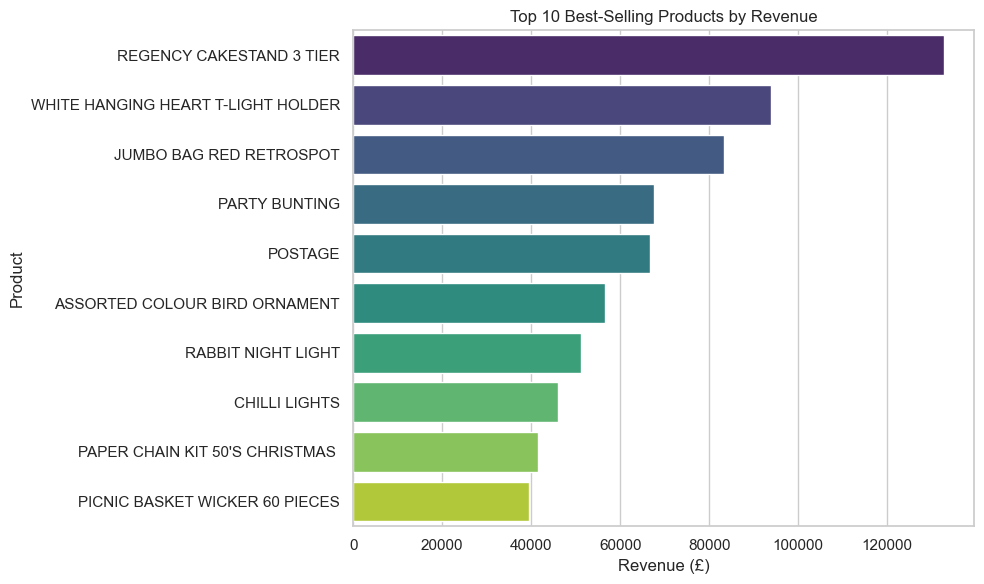

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_products.values, 
    y=top_products.index, 
    hue=top_products.index, 
    palette="viridis", 
    legend=False
)
plt.title("Top 10 Best-Selling Products by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


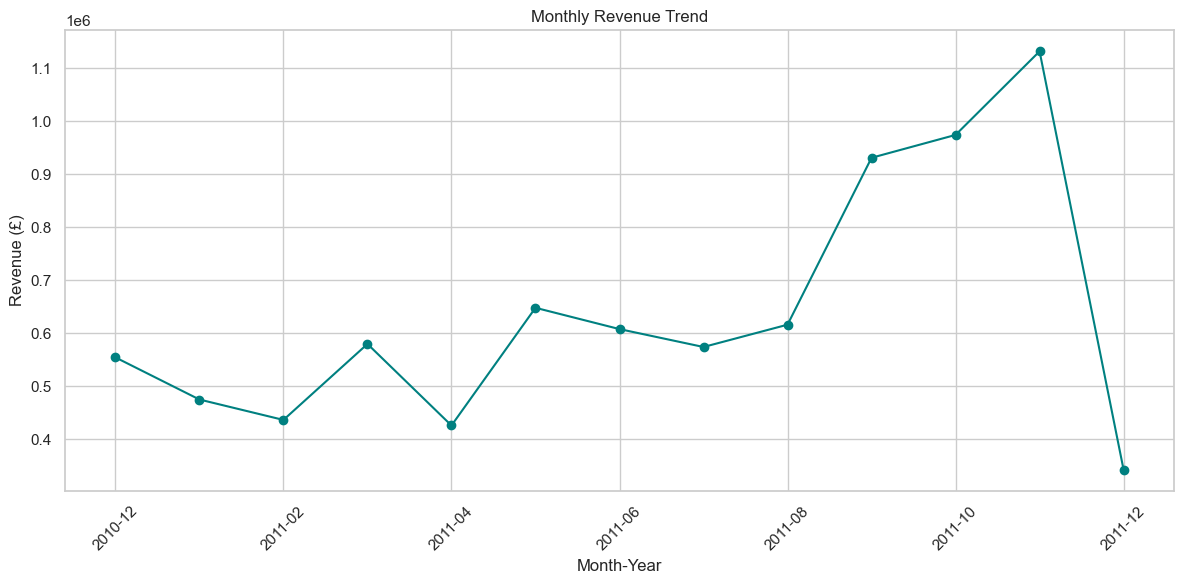

In [15]:
monthly_revenue = df_clean.groupby('MonthYear')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (£)")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 6: SQL Queries using pandasql

Here we use `pandasql` to run SQL-like queries directly on our DataFrame.  
This simulates real-world analytics queries and showcases SQL skills.

Examples:
- Total revenue
- Grouping by `Description` or `Country`
- Revenue trends by `MonthYear`


In [16]:
import pandasql as psql


In [17]:
q = lambda query: psql.sqldf(query, globals())

In [18]:
q("SELECT * FROM df_clean LIMIT 5")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MonthYear,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.39,17850.0,United Kingdom,2010-12,20.34


In [19]:
q("""
SELECT SUM(TotalPrice) AS total_revenue
FROM df_clean
""")


,total_revenue
0,8300065.814


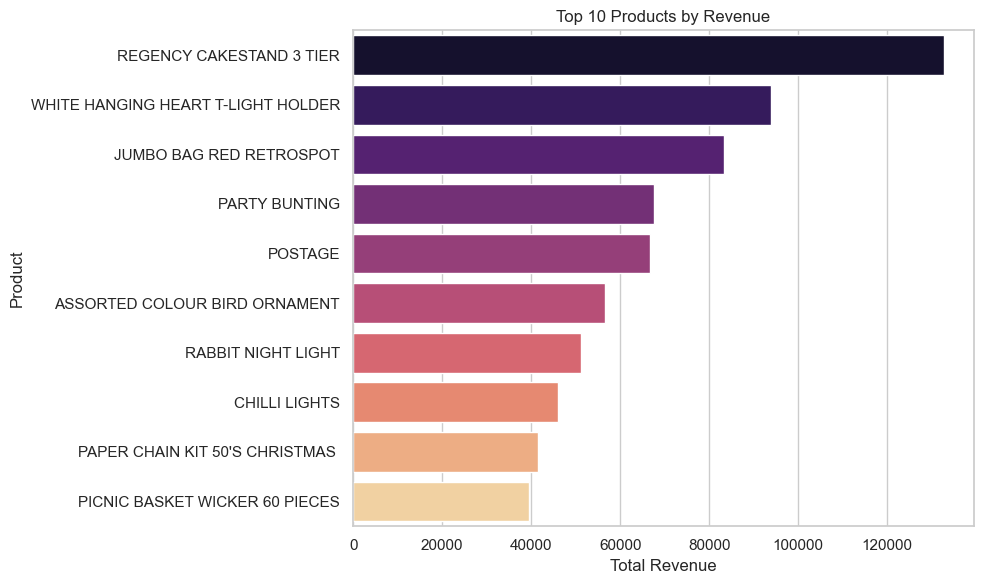

In [20]:
top_products_df = q("""
SELECT Description, SUM(TotalPrice) AS Revenue
FROM df_clean
GROUP BY Description
ORDER BY Revenue DESC
LIMIT 10
""")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='Description', x='Revenue', data=top_products_df, hue='Description', palette='magma', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()



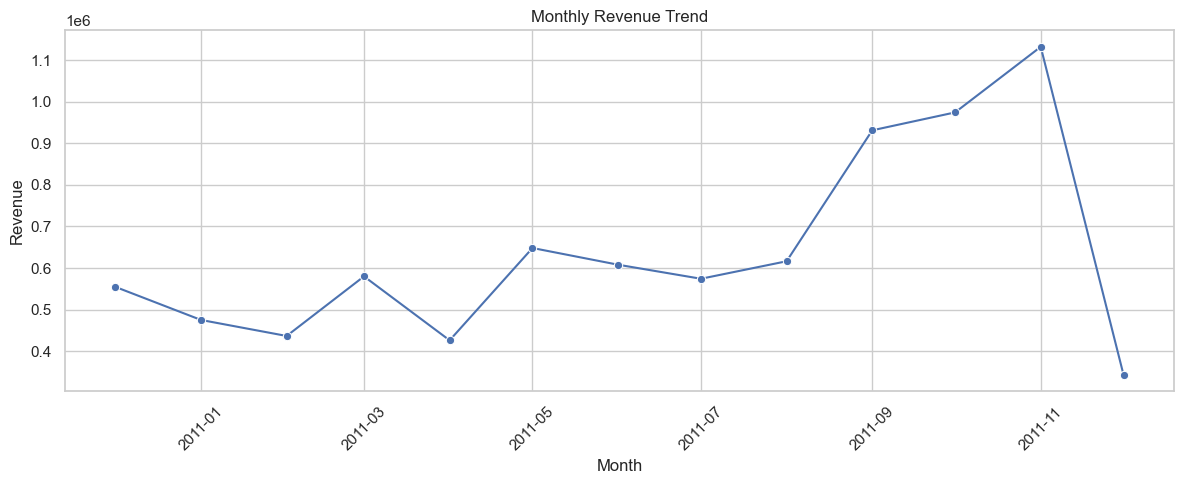

In [21]:
monthly_revenue_df = q("""
SELECT MonthYear, SUM(TotalPrice) AS MonthlyRevenue
FROM df_clean
GROUP BY MonthYear
ORDER BY MonthYear
""")

monthly_revenue_df['MonthYear'] = pd.to_datetime(monthly_revenue_df['MonthYear'])

plt.figure(figsize=(12, 5))
sns.lineplot(x='MonthYear', y='MonthlyRevenue', data=monthly_revenue_df, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


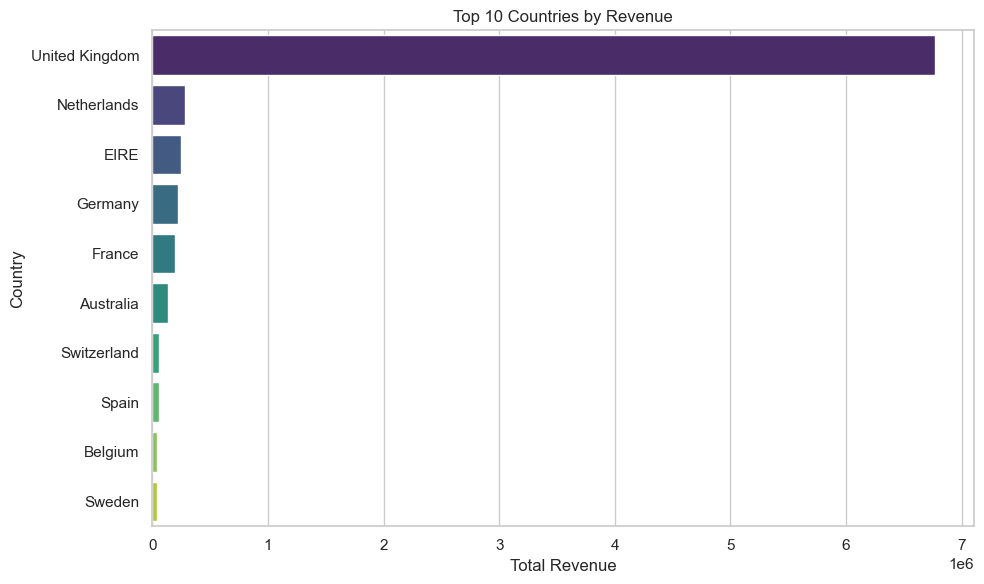

In [22]:
top_countries_df = q("""
SELECT Country, SUM(TotalPrice) AS Revenue
FROM df_clean
GROUP BY Country
ORDER BY Revenue DESC
LIMIT 10
""")

plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Country', data=top_countries_df, hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## 📊 Summary

This project demonstrates the ability to:
- Clean and transform real-world data
- Use SQL within Python
- Perform revenue and trend analysis
- Communicate findings using clear visualizations
